In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../TileEM/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [3]:
%load_ext autoreload
%autoreload 2
from TileEM import *
from Qj_pTprime_models import *

In [216]:
def plot_worker_histo(Qj_lst,step_size=10):
    # Plotting Worker Quality Histogram
    for Qiter,Qj in enumerate(Qj_lst):
        if Qiter%step_size==0:
            Qjs = zip(*Qj)
            plt.figure()
            for i in range(len(Qjs)):
                plt.title("Worker Quality; Iteration #{}".format(Qiter))
                plt.hist(Qjs[i],bins=len(Qj),label="Q{}".format(i))
                plt.legend(loc= "top left")
            plt.xlim(0,1.1)

In [207]:
def plot_Ts(objid,T_lst,Tstar_idx_lst,step_size=10):
    my_BBG  = pd.read_csv("my_ground_truth.csv")
    ground_truth_match = my_BBG[my_BBG.object_id==objid]
    x_locs,y_locs =  process_raw_locs([ground_truth_match["x_locs"].iloc[0],ground_truth_match["y_locs"].iloc[0]])
    BBG = shapely.geometry.Polygon(zip(x_locs,y_locs))
    tiles=np.array(pkl.load(open("output_15/vtiles{}.pkl".format(objid))))

    tiles=np.array(pkl.load(open("output_15/vtiles{}.pkl".format(objid))))
    visualizeTilesSeparate(tiles)
    plt.title("Original Tiles")
    
    for i in range(len(T_lst)):
        if i%step_size==0:
            T=T_lst[i]
            idx=Tstar_idx_lst[i]
    #         if i==0:
    #             visualizeTilesSeparate(T)
    #         else:
    #             visualizeTilesSeparate(T[0])
    #         plt.title("Joined T* ; Iteration #{}".format(i))
    #         plot_coords(BBG,reverse_xy=True,color="blue",linestyle="--")

    #         print "i:",i
            visualizeTilesSeparate(tiles[idx])
            plt.title("T* components; Iteration #{}".format(i))
            plt.suptitle("P={0};R={1}".format(poly_precision(T[0],BBG),poly_precision(T[0],BBG)))
            plot_coords(BBG,reverse_xy=True,color="blue",linestyle="--")

In [208]:
def poly_precision(poly,BBG,round_dig=2):
    poly=poly.buffer(0)
    BBG = BBG.buffer(0)
    return poly.intersection(BBG).buffer(0).area/poly.area

In [209]:
def poly_recall(poly,BBG,round_dig=2):
    #print "Intersection:",poly.intersection(BBG).area
    #print "BBG:",BBG.area
    poly=poly.buffer(0)
    BBG = BBG.buffer(0)
    return poly.intersection(BBG).area/BBG.area,round_dig

In [210]:
def plot_likelihood(likelihood_lst):
    plt.figure()
    plt.plot(likelihood_lst)
    plt.ylabel("Likelihood")
    plt.xlabel("Iterations")

In [219]:
def run_all_experiment_plots(objid,exp_num,step_size=10):
    Qj_lst = pkl.load(open("Qj_exp{0}_obj{1}.pkl".format(exp_num,objid)))
    T_lst = pkl.load(open("Tstar_exp{0}_obj{1}.pkl".format(exp_num,objid)))
    Tstar_idx_lst = pkl.load(open("Tstar_idx_exp{0}_obj{1}.pkl".format(exp_num,objid)))
    likelihood_lst= pkl.load(open("likelihood_exp{0}_obj{1}.pkl".format(exp_num,objid)))
    plot_Ts(objid,T_lst,Tstar_idx_lst,step_size=step_size)
    plot_likelihood(likelihood_lst)
    plot_worker_histo(Qj_lst,step_size=step_size)

# Experiment 14 : Initialization with Qj=[0.5...]

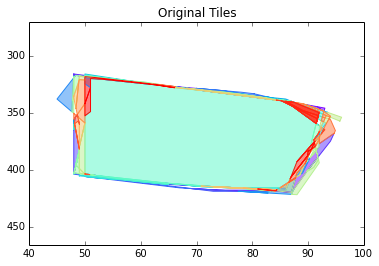

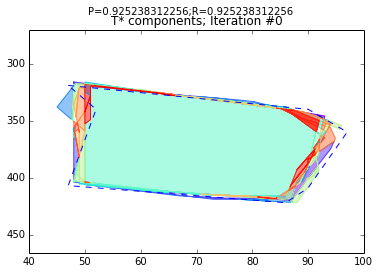

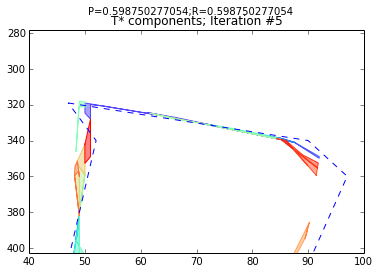

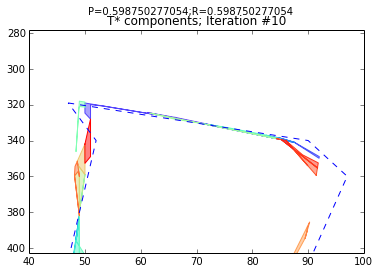

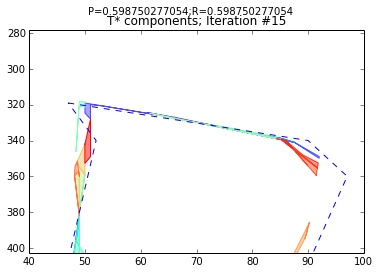

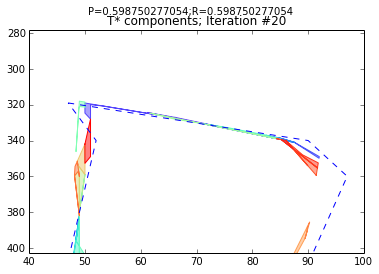

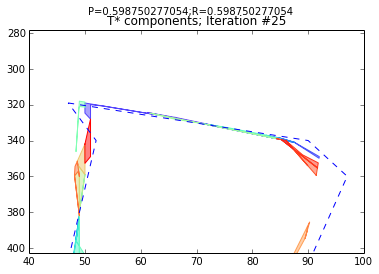

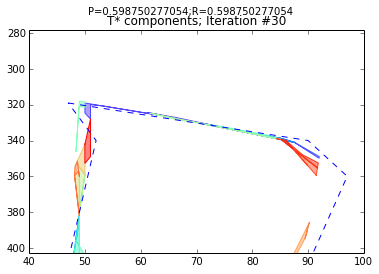

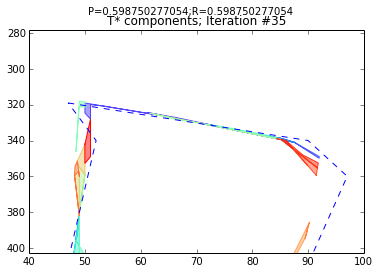

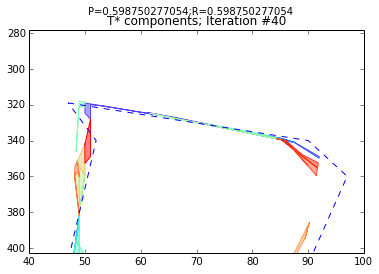

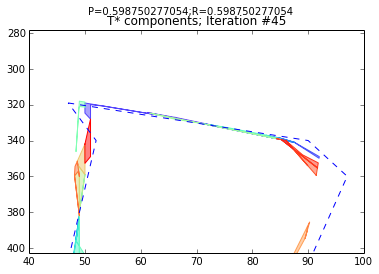

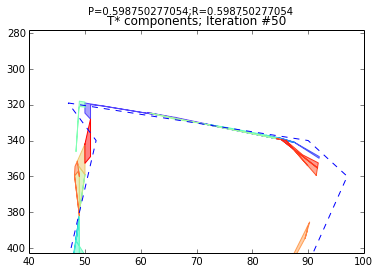

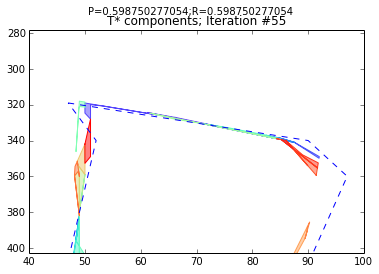

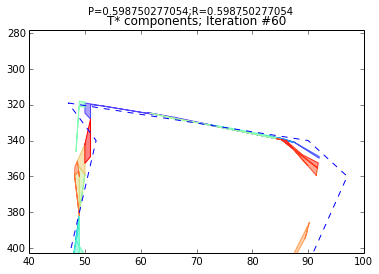

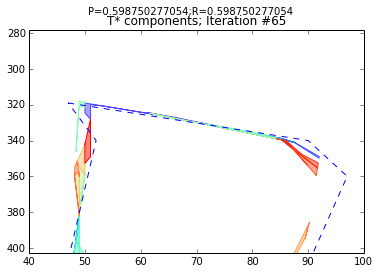

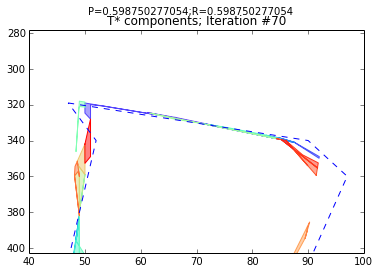

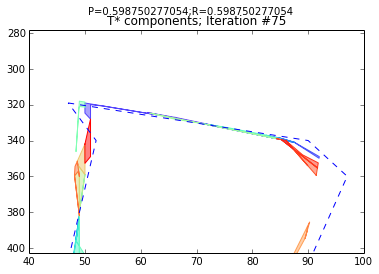

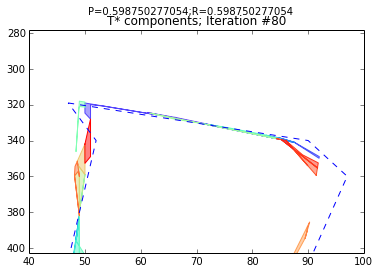

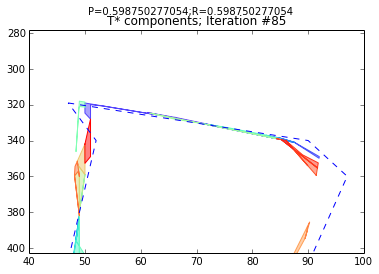

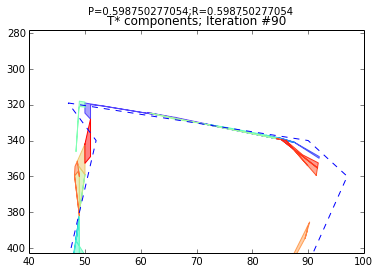

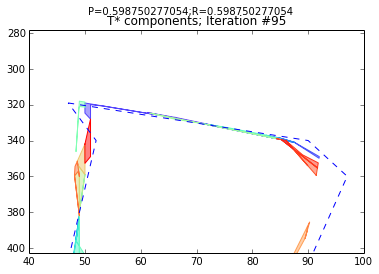

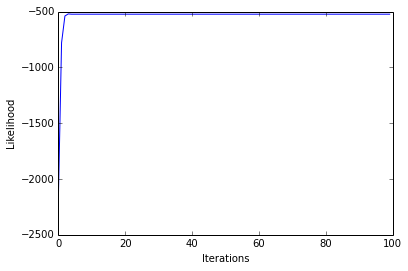

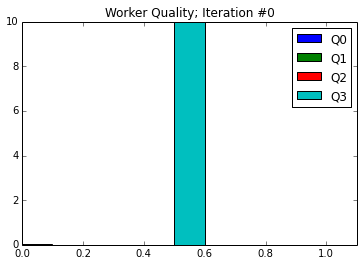

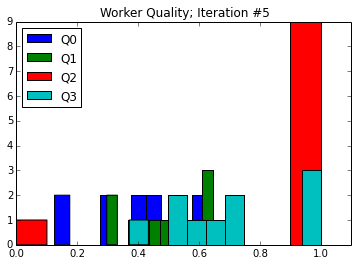

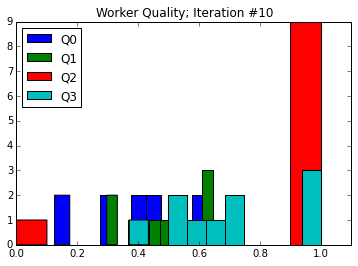

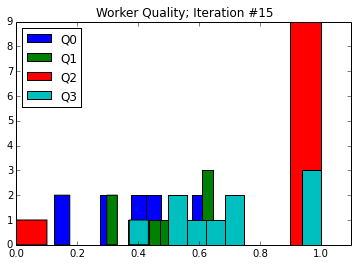

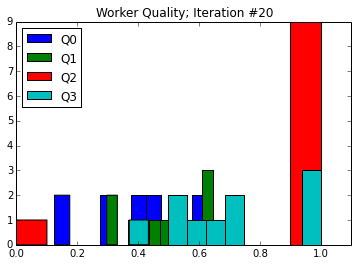

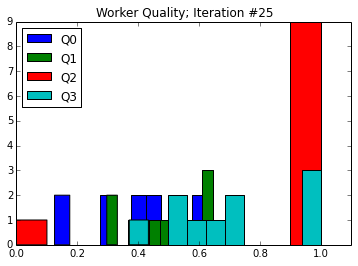

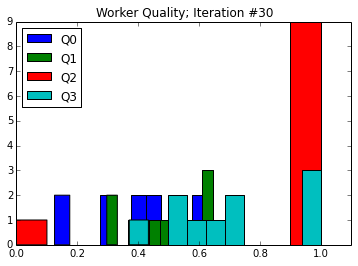

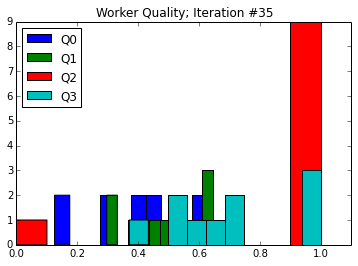

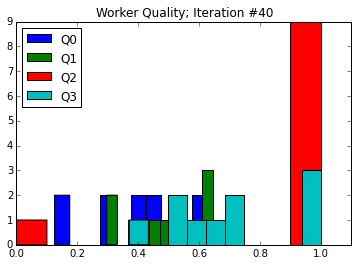

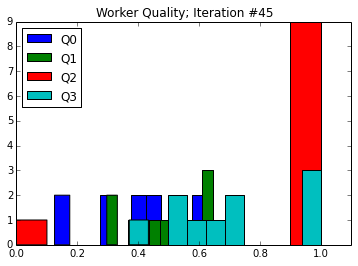

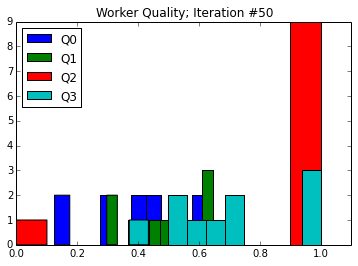

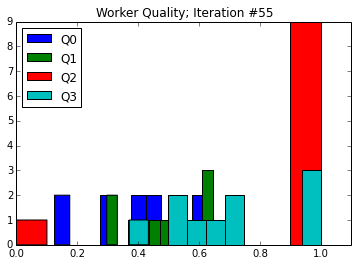

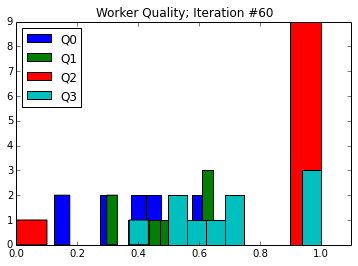

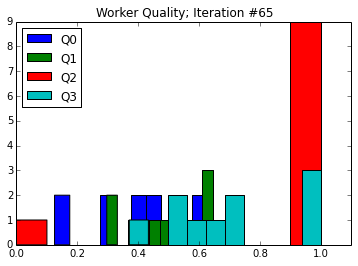

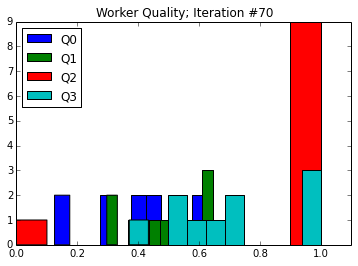

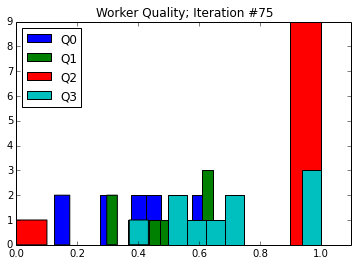

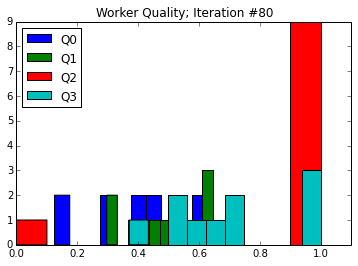

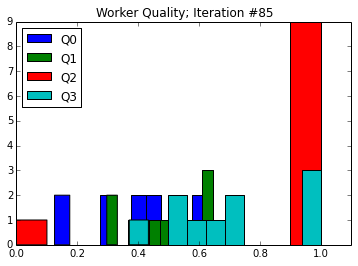

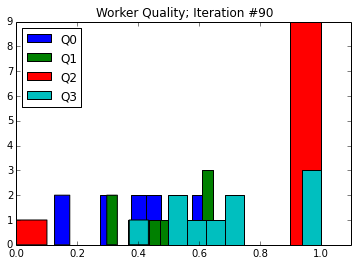

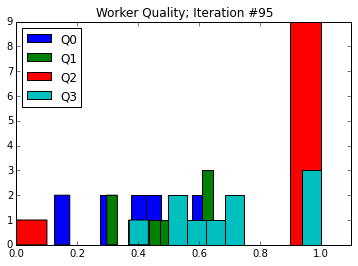

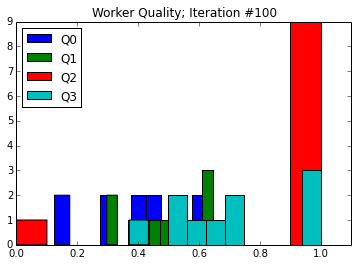

In [220]:
run_all_experiment_plots(3,14,5)

# Experiment 15 : Initialization with Qj=[0.6...] qj >0.5

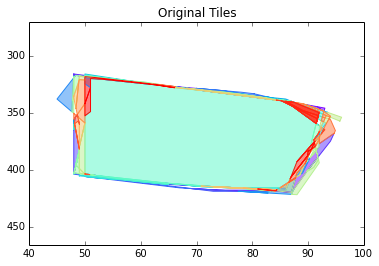

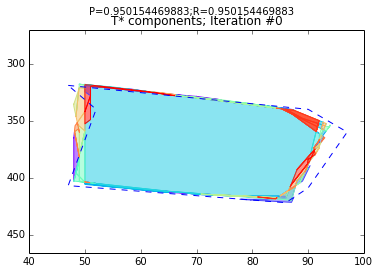

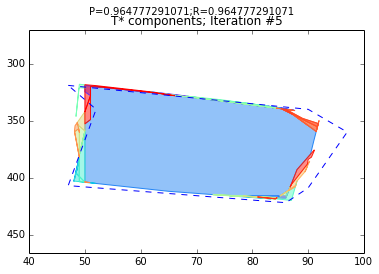

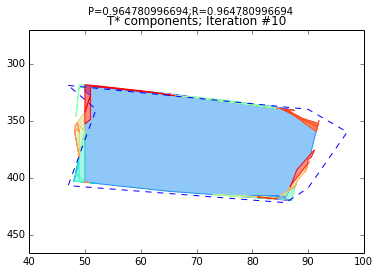

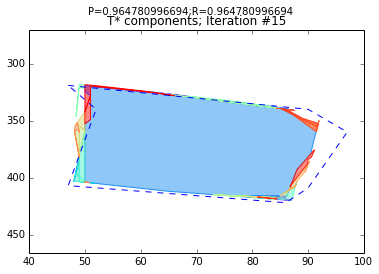

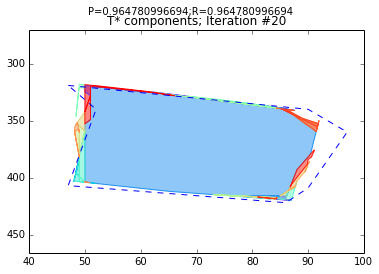

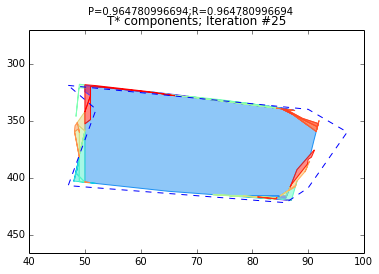

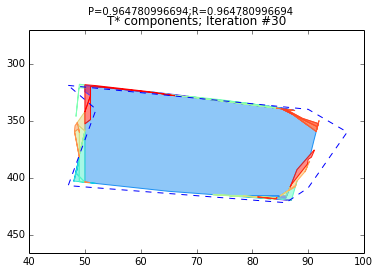

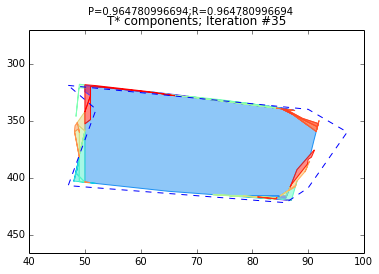

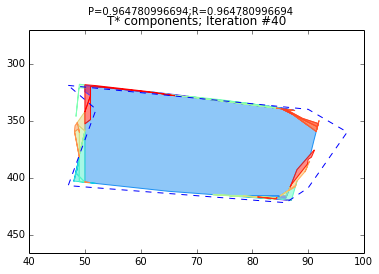

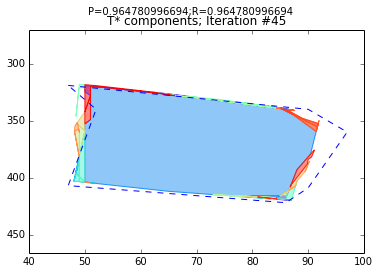

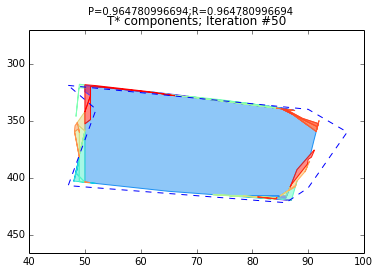

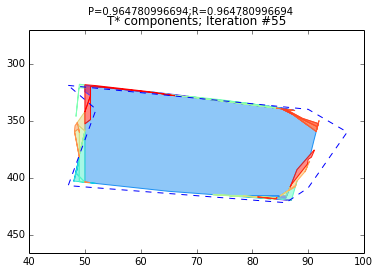

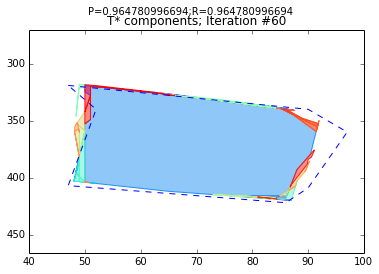

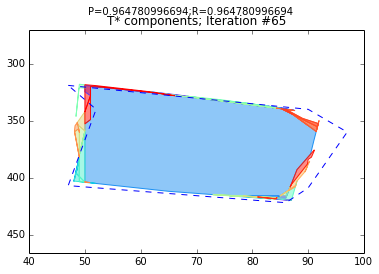

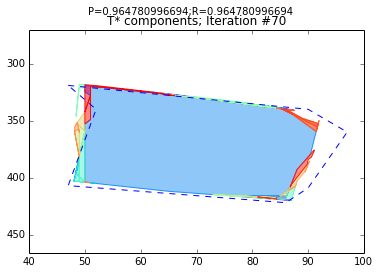

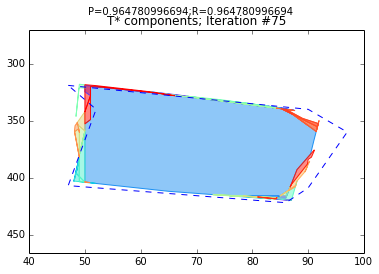

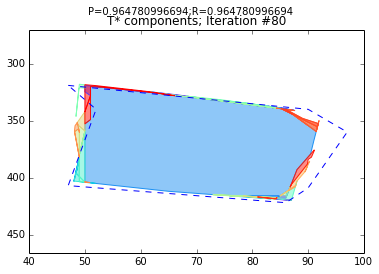

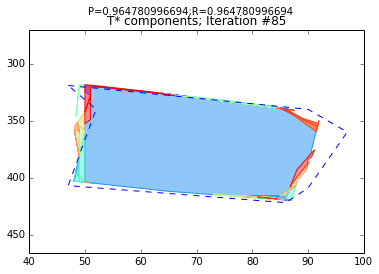

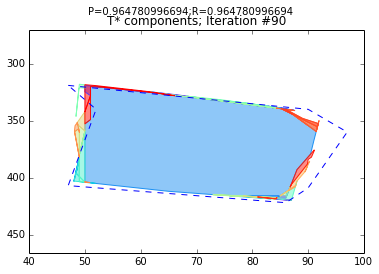

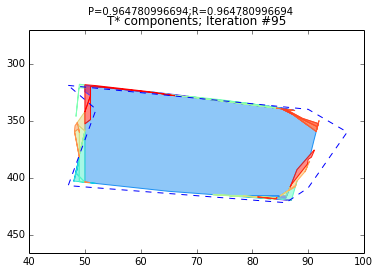

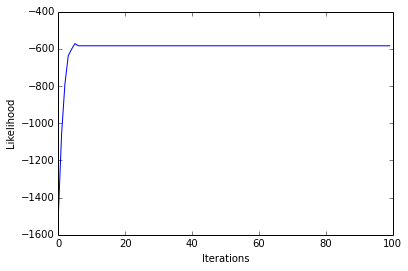

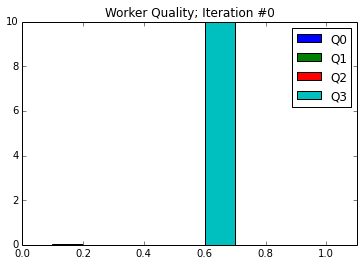

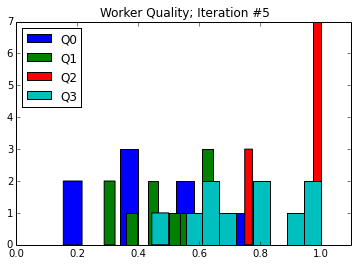

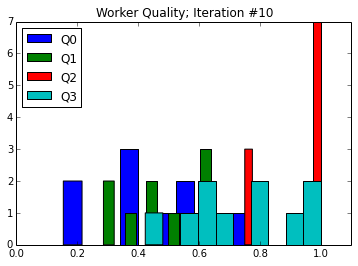

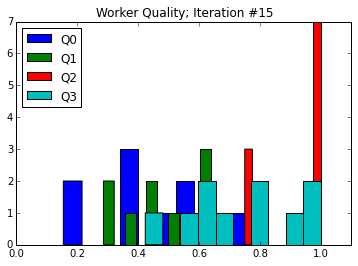

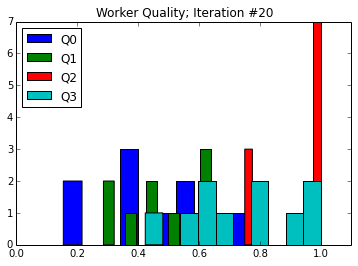

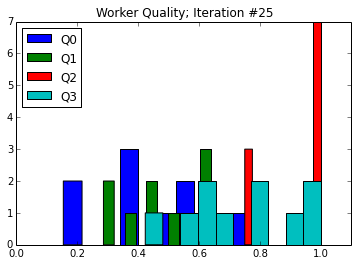

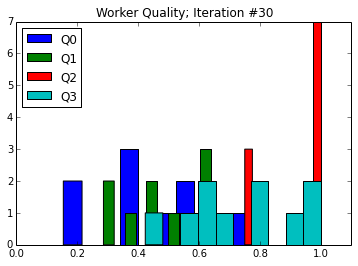

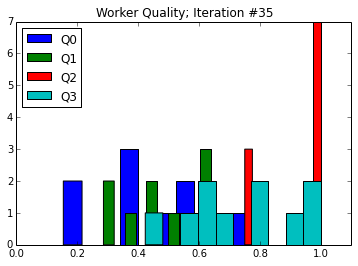

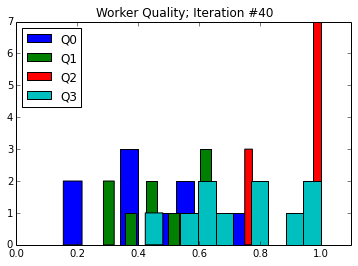

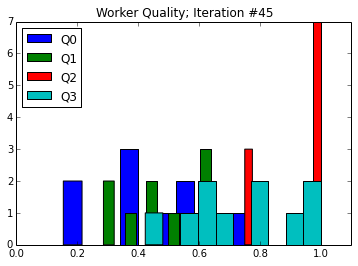

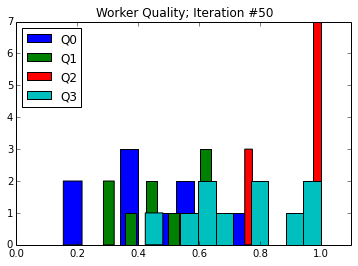

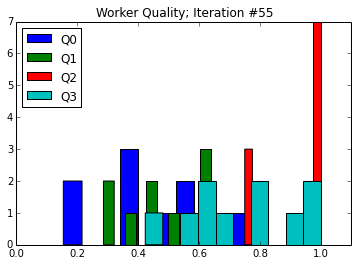

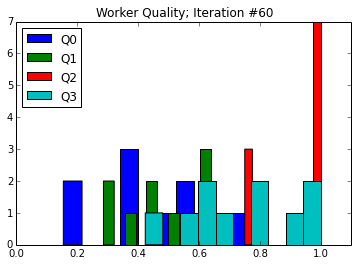

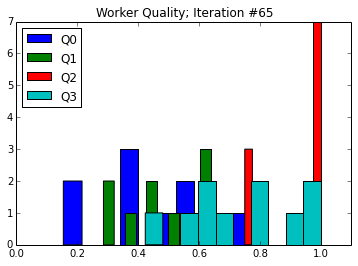

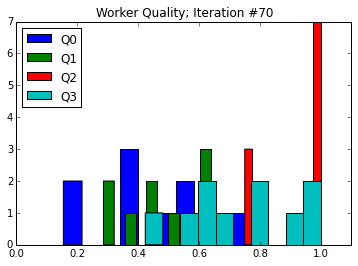

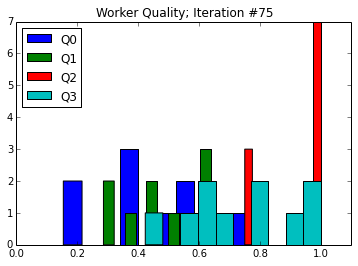

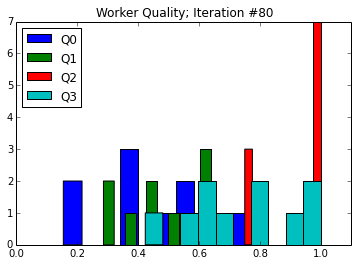

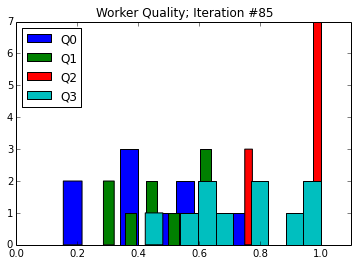

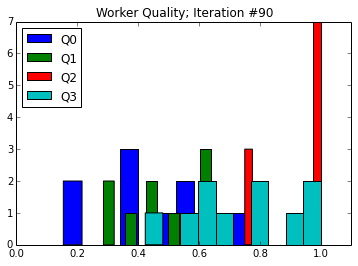

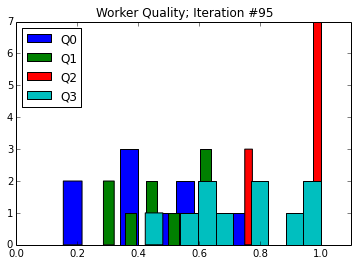

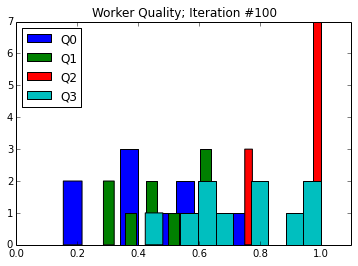

In [221]:
run_all_experiment_plots(3,15,5)

# Experiment 16 : Initialization with Qj=[0.7...] qj >0.5

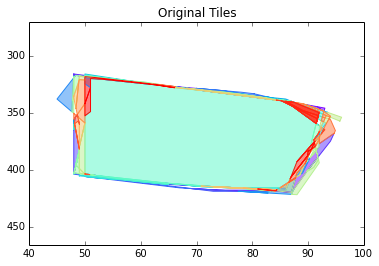

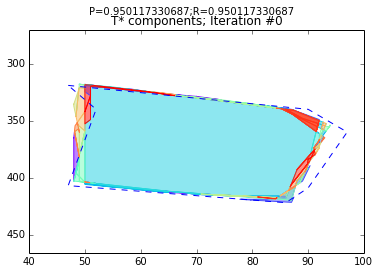

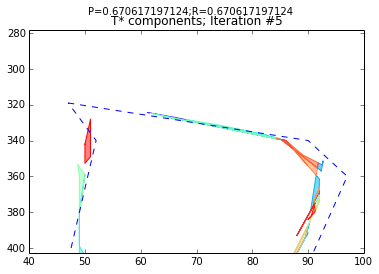

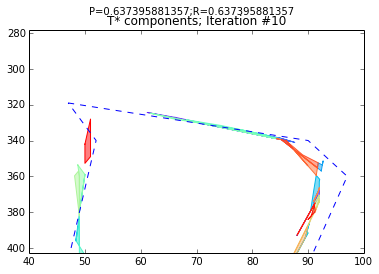

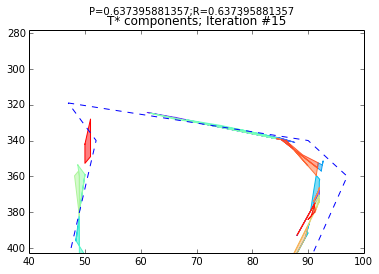

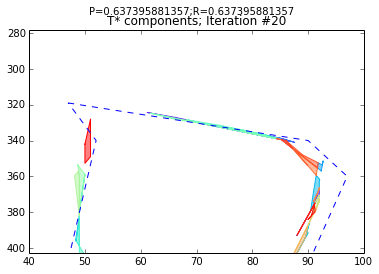

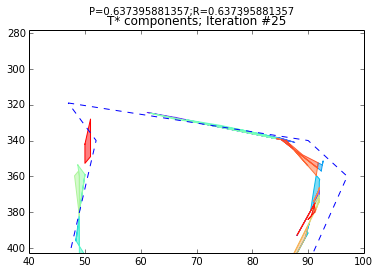

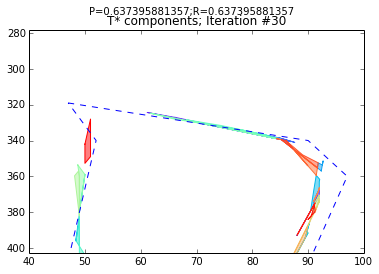

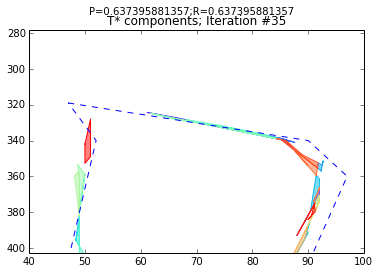

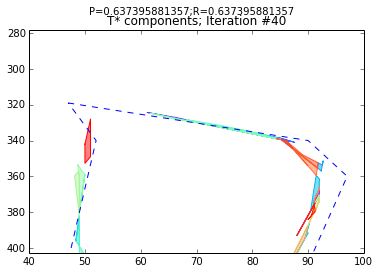

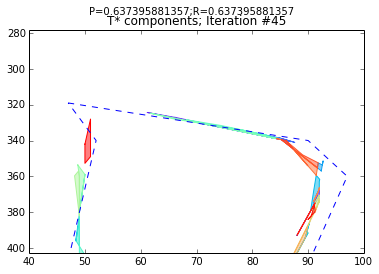

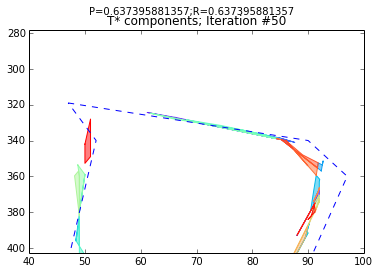

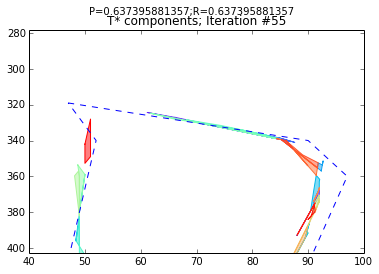

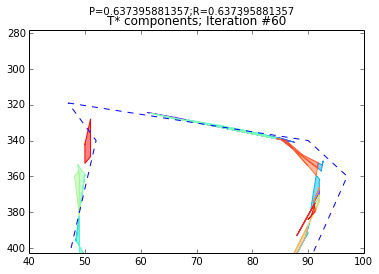

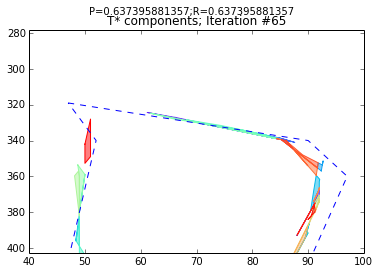

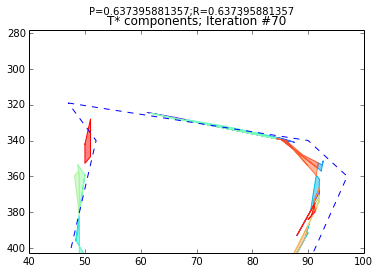

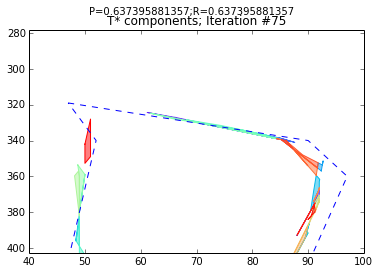

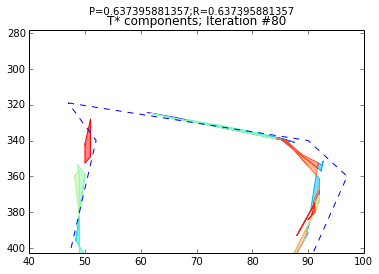

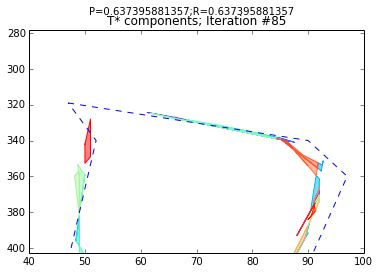

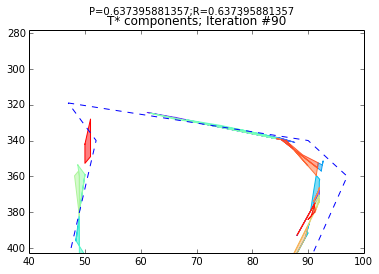

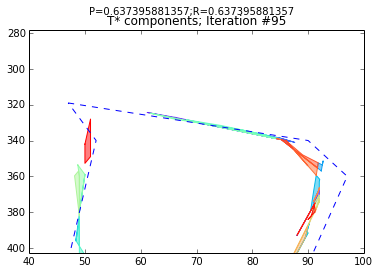

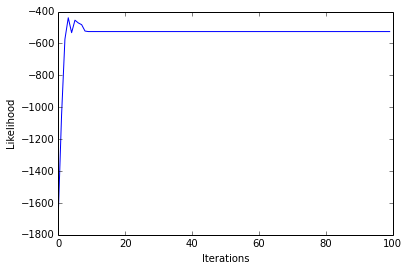

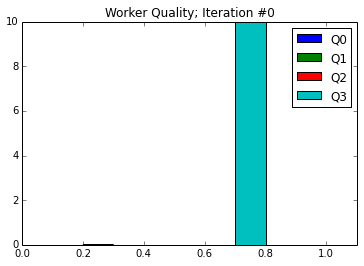

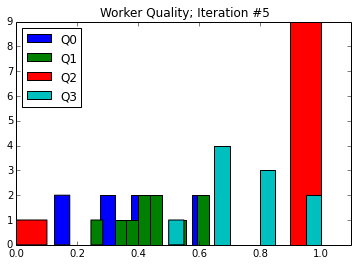

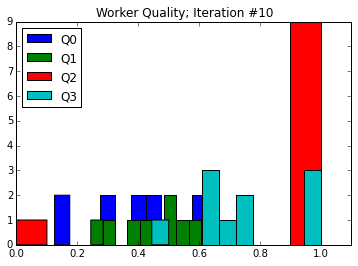

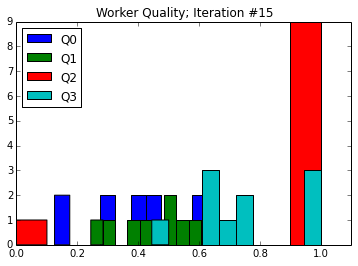

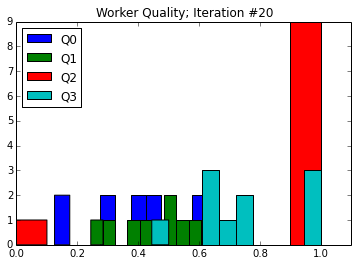

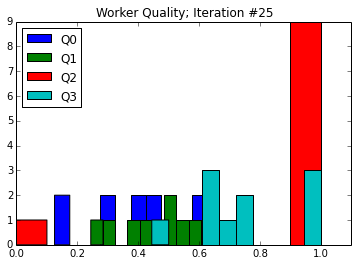

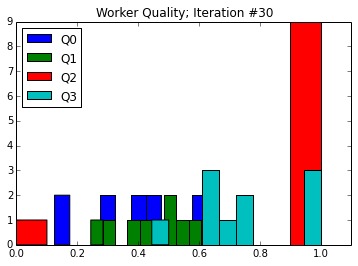

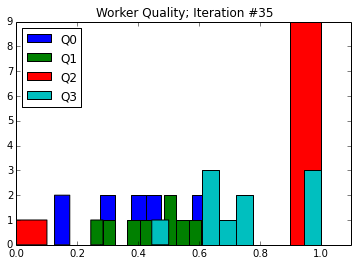

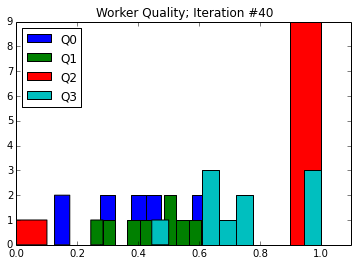

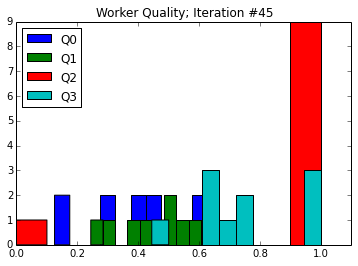

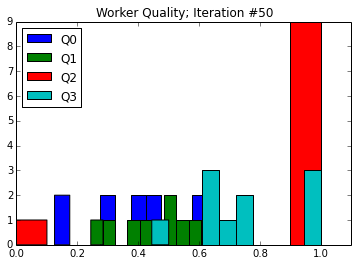

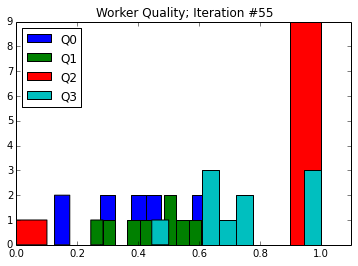

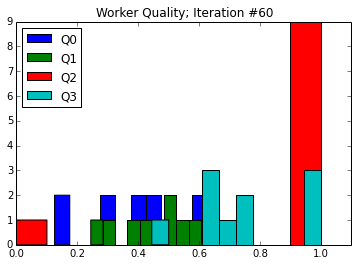

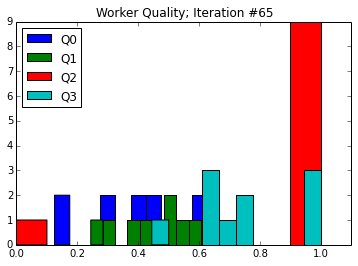

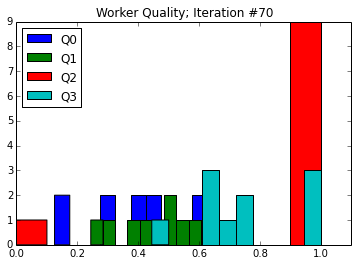

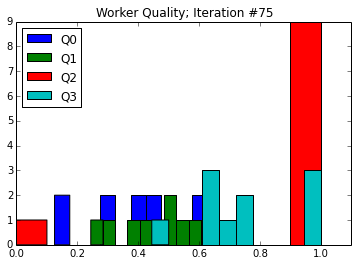

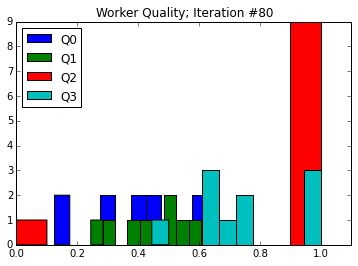

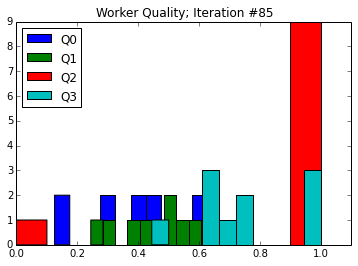

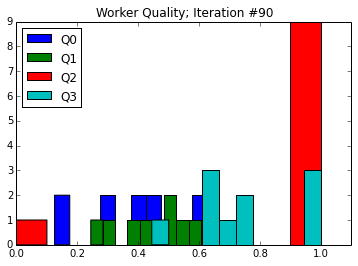

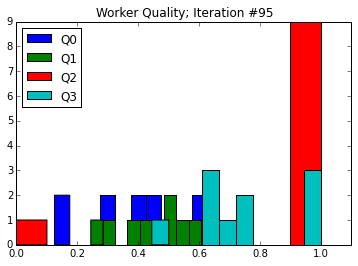

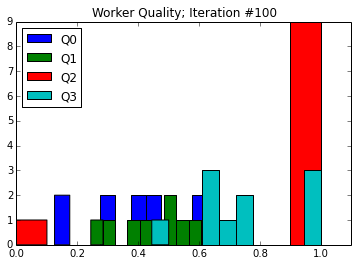

In [222]:
run_all_experiment_plots(3,16,5)

# Experiment 17: Initialize with high confidence snowball

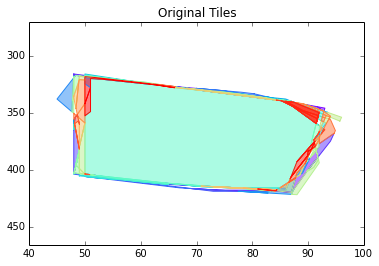

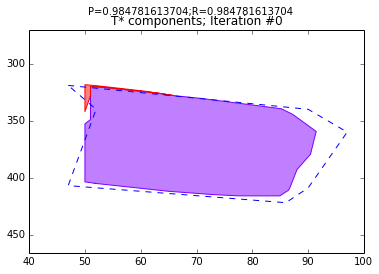

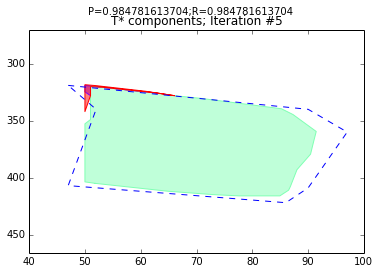

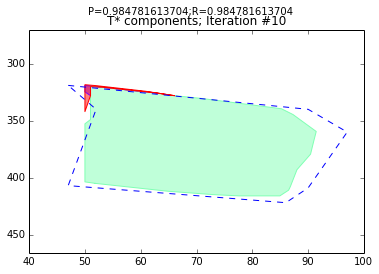

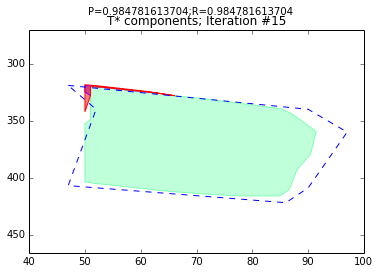

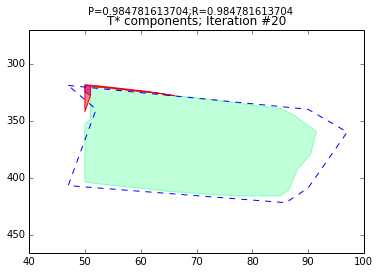

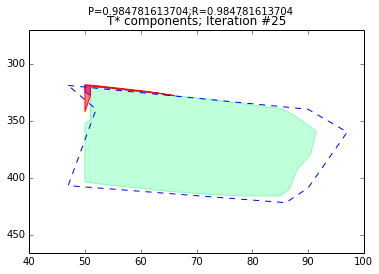

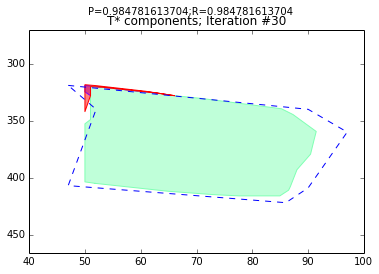

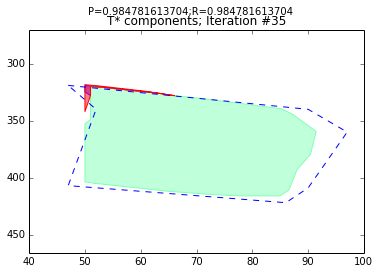

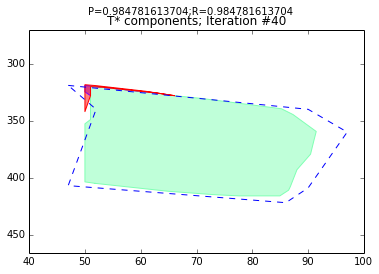

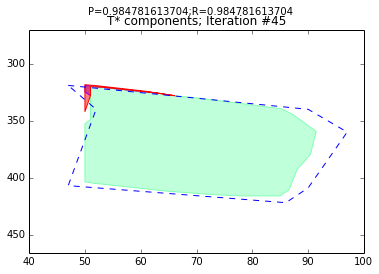

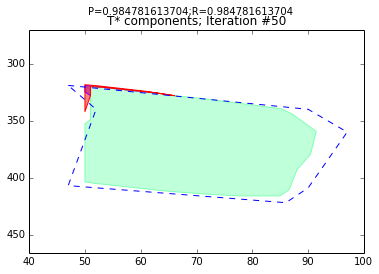

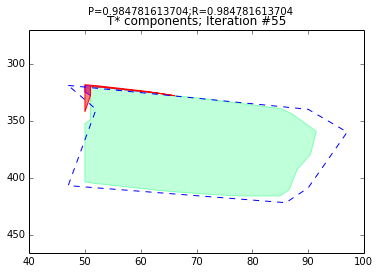

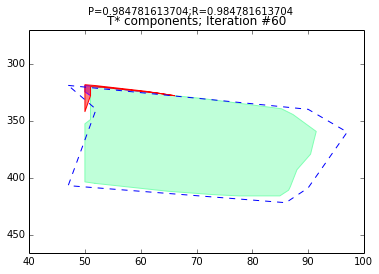

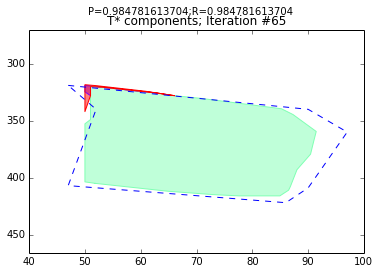

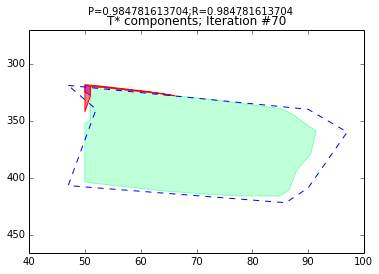

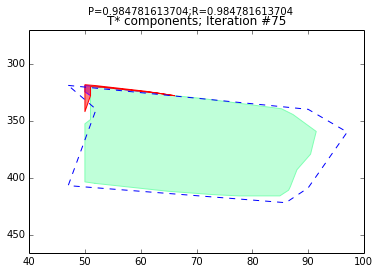

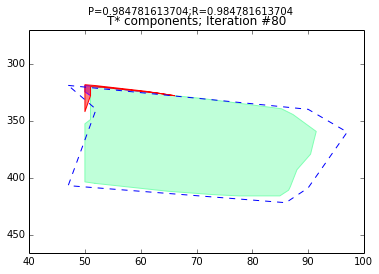

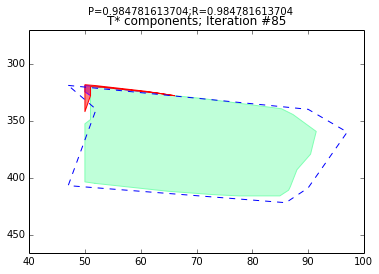

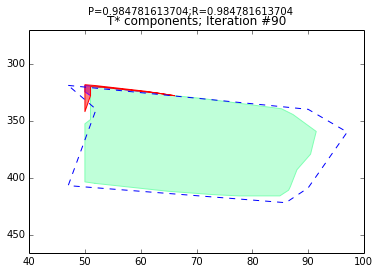

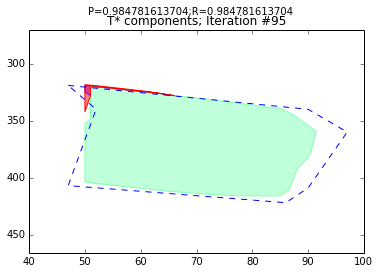

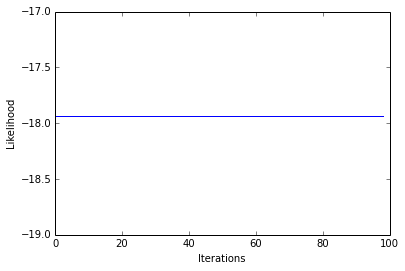

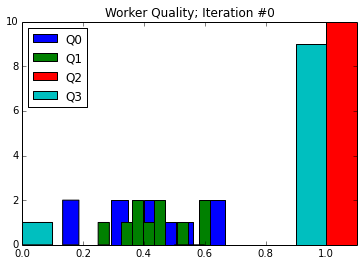

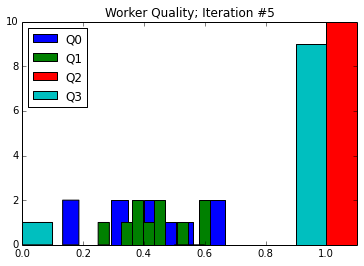

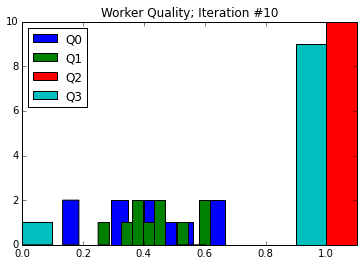

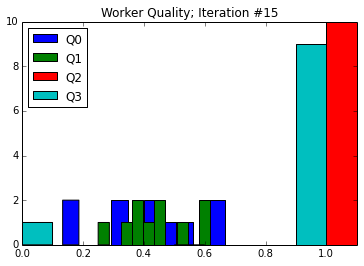

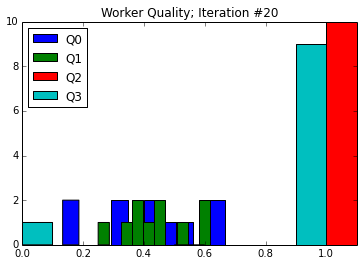

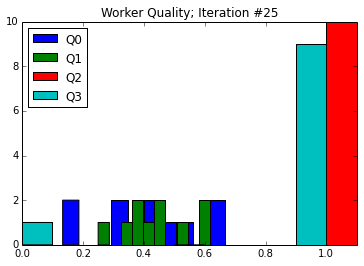

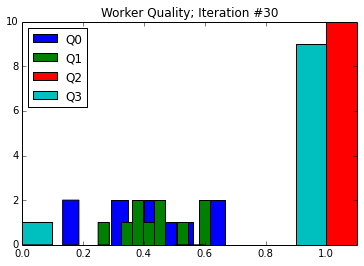

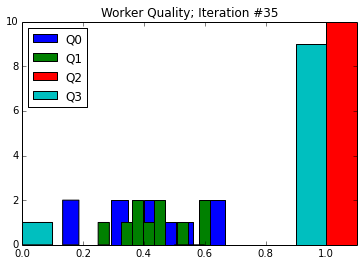

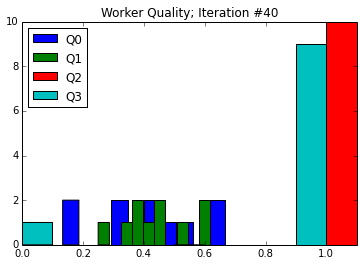

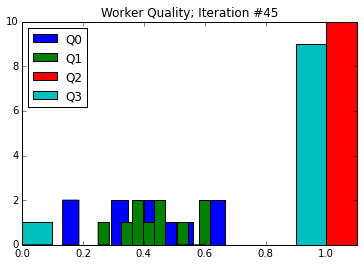

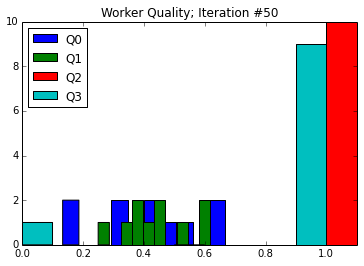

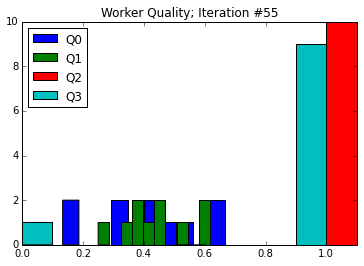

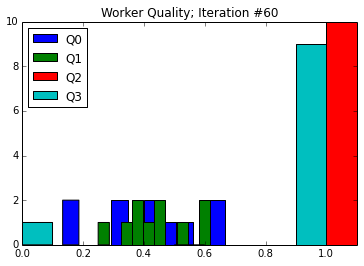

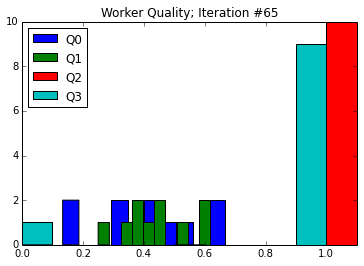

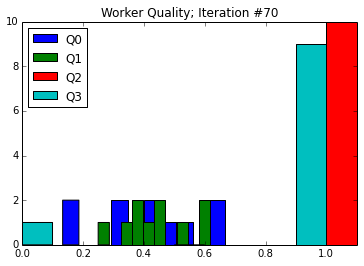

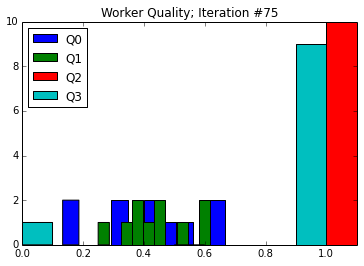

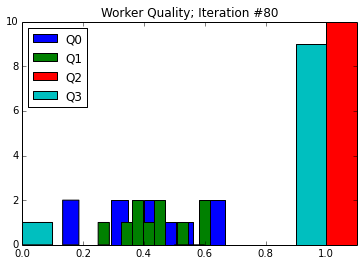

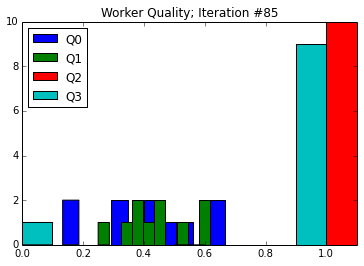

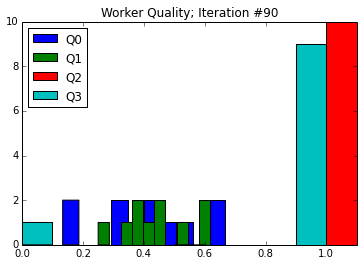

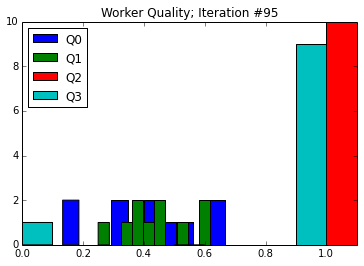

In [223]:
run_all_experiment_plots(3,17,5)

The likelihood plot is same across all thress because if we are just adding plk as both pInT and pNotInT then that is all the tiles there is 

TODO: 
  - ~~compute PR against GT~~ 
  - ~~try running for longer iterations~~ 

-----